In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from pathlib import Path

In [2]:
# add csv file
data_salaries_csv = Path("../Resources/salaries.csv")

In [3]:
# read the data
data_salaries_df = pd.read_csv(data_salaries_csv)

In [4]:
# filter by employment type (get only full-time)
data_salaries_df["employment_type"].value_counts()
data_salaries_df = data_salaries_df.loc[(data_salaries_df["employment_type"]=="FT")]

In [5]:
# filter by country (get only US & drop redundant columns)
data_salaries_df["company_location"].value_counts()


company_location
US    6748
GB     395
CA     177
ES     106
DE      70
      ... 
AM       1
QA       1
HK       1
ZA       1
MT       1
Name: count, Length: 70, dtype: int64

In [6]:
# filter by experience level
data_salaries_df["experience_level"].value_counts()
data_salaries_en_df = data_salaries_df.loc[(data_salaries_df["experience_level"]=="EN")]
data_salaries_mi_df = data_salaries_df.loc[(data_salaries_df["experience_level"]=="MI")]
data_salaries_se_df = data_salaries_df.loc[(data_salaries_df["experience_level"]=="SE")]
data_salaries_ex_df = data_salaries_df.loc[(data_salaries_df["experience_level"]=="EX")]

In [7]:
data_salaries_df["experience_level"].value_counts()

# Filter to get only entry level data analysts
data_salaries_da_df = data_salaries_df.loc[(data_salaries_df["experience_level"] == "EN")]

# Now you have 'data_salaries_da_df' defined
data_salaries_da_en_df = data_salaries_da_df
data_salaries_da_en_df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
28,2023,EN,FT,Data Engineer,130916,USD,130916,US,0,US,M
29,2023,EN,FT,Data Engineer,120000,USD,120000,US,0,US,M
98,2023,EN,FT,ML Engineer,76000,USD,76000,US,0,US,L
101,2023,EN,FT,Data Analyst,80800,USD,80800,US,0,US,M
102,2023,EN,FT,Data Analyst,53800,USD,53800,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
7867,2020,EN,FT,AI Scientist,300000,DKK,45896,DK,50,DK,S
7874,2020,EN,FT,Data Scientist,55000,EUR,62726,DE,50,DE,S
7889,2021,EN,FT,Business Data Analyst,50000,EUR,59102,LU,100,LU,L
7894,2021,EN,FT,AI Scientist,1335000,INR,18053,IN,100,AS,S


In [8]:
# find average entry level data analyst salary by company_size
data_salaries_da_en_df.groupby(["company_size"])["salary"].mean()

company_size
L    279005.400000
M    142603.155556
S    220992.500000
Name: salary, dtype: float64

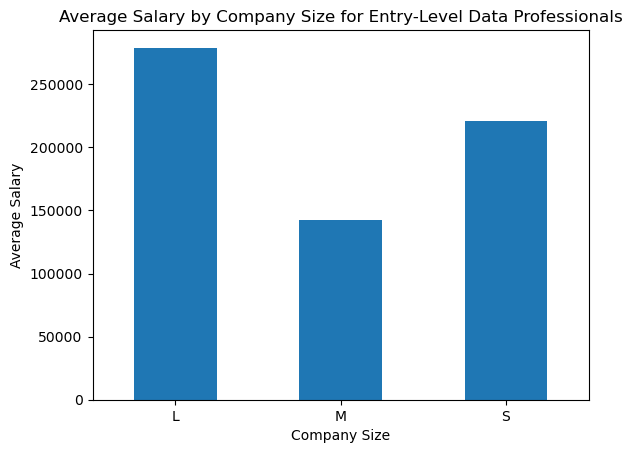

In [9]:
# Create a bar plot to visualize the average salaries by company size
average_salary_by_company_size = data_salaries_da_en_df.groupby(["company_size"])["salary"].mean()
average_salary_by_company_size.plot(kind="bar")
plt.title("Average Salary by Company Size for Entry-Level Data Professionals")
plt.xlabel("Company Size")
plt.ylabel("Average Salary")
plt.xticks(rotation=0)
plt.show()

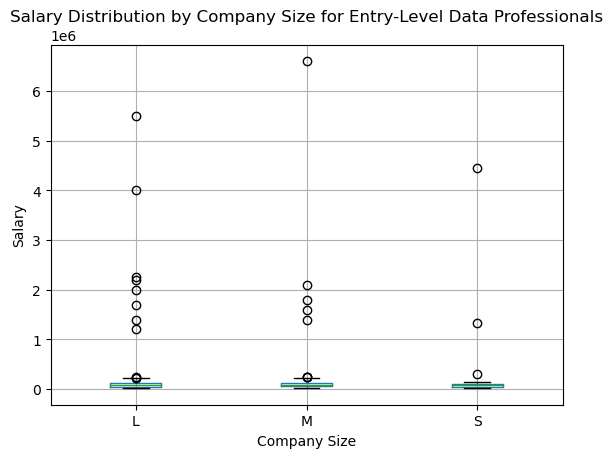

In [10]:
data_salaries_da_en_df.boxplot(column='salary', by='company_size')
plt.title("Salary Distribution by Company Size for Entry-Level Data Professionals")
plt.suptitle("")  # Remove default title
plt.xlabel("Company Size")
plt.ylabel("Salary")
plt.xticks(rotation=0)
plt.show()

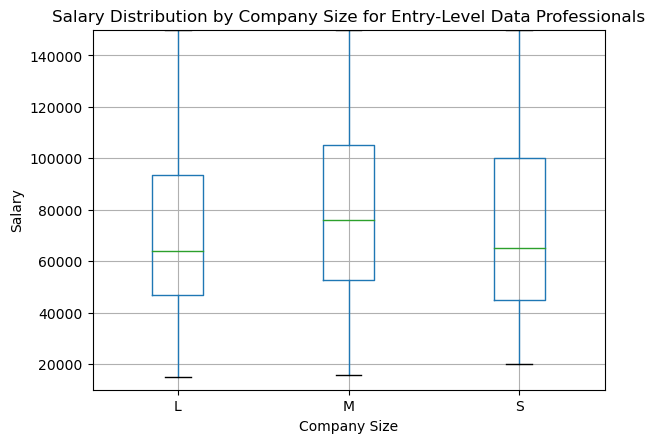

In [11]:
# specify upper and lower bounds
lower_bound = 10000  
upper_bound = 150000  

# Filter the data to include only values within the bounds
filtered_data = data_salaries_da_en_df[(data_salaries_da_en_df['salary'] >= lower_bound) & (data_salaries_da_en_df['salary'] <= upper_bound)]

# Create the boxplot with the filtered data
filtered_data.boxplot(column='salary', by='company_size')
plt.title("Salary Distribution by Company Size for Entry-Level Data Professionals")
plt.suptitle("")  # Remove default title
plt.xlabel("Company Size")
plt.ylabel("Salary")
plt.xticks(rotation=0)

# Set the upper and lower bounds for the whiskers
plt.ylim(lower_bound, upper_bound)

plt.show()

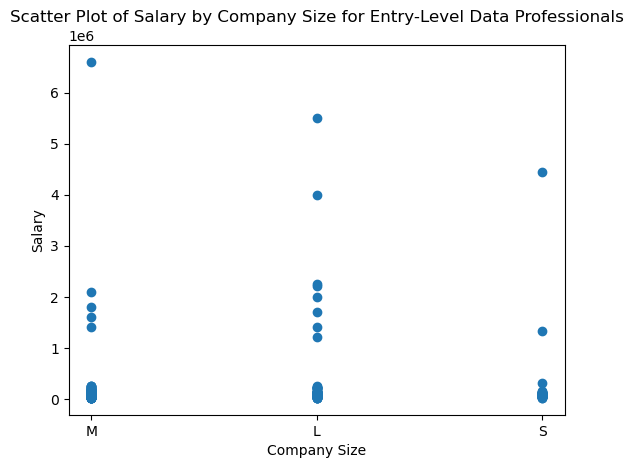

In [12]:
plt.scatter(data_salaries_da_en_df['company_size'], data_salaries_da_en_df['salary'])
plt.title("Scatter Plot of Salary by Company Size for Entry-Level Data Professionals")
plt.xlabel("Company Size")
plt.ylabel("Salary")
plt.xticks(rotation=0)
plt.show()

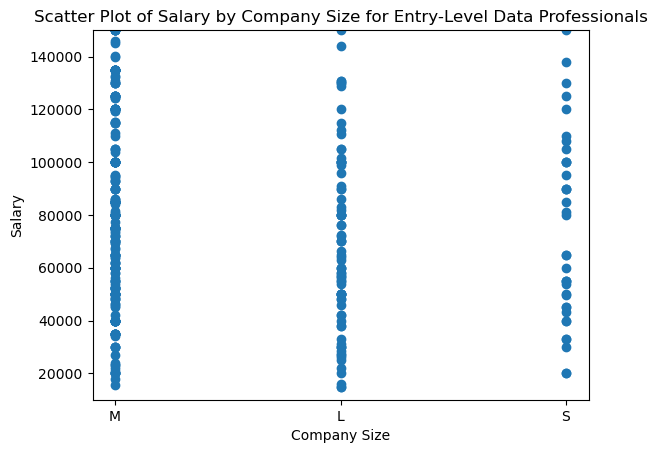

In [13]:
# Specify upper and lower bounds
lower_bound = 10000  
upper_bound = 150000  

plt.scatter(data_salaries_da_en_df['company_size'], data_salaries_da_en_df['salary'])
plt.title("Scatter Plot of Salary by Company Size for Entry-Level Data Professionals")
plt.xlabel("Company Size")
plt.ylabel("Salary")
plt.xticks(rotation=0)

# Set the upper and lower bounds for the y-axis
plt.ylim(lower_bound, upper_bound)

plt.show()

In [14]:
# Filter the DataFrame to get only entry-level data professionals
entry_level_df = data_salaries_df[data_salaries_df['experience_level'] == 'EN']

# Group by job title and calculate the mean salary for each job title
average_salary_by_job = entry_level_df.groupby('job_title')['salary'].mean()

# Sort the job titles by average salary in descending order and select the top 5
top_5_jobs = average_salary_by_job.sort_values(ascending=False).head(5)

# Join the top 5 job titles with the original DataFrame to get company size information
result_df = entry_level_df[entry_level_df['job_title'].isin(top_5_jobs.index)][['job_title', 'salary', 'company_size']]

# Sort the result by salary from highest to lowest
result_df = result_df.sort_values(by='salary', ascending=False)

# Display the result
print(result_df)

                               job_title   salary company_size
3987                   Research Engineer  5500000            L
3834  Applied Machine Learning Scientist  4000000            L
1251                AI Research Engineer  2000000            L
7894                        AI Scientist  1335000            S
7817                   Big Data Engineer  1200000            L
7867                        AI Scientist   300000            S
6234                        AI Scientist   200000            L
4040                   Research Engineer   165000            M
4728                   Research Engineer   160000            M
5954                   Research Engineer   160000            M
4618                   Research Engineer   155000            M
4632                   Research Engineer   155000            M
4041                   Research Engineer   145000            M
5620                   Big Data Engineer   130000            S
4619                   Research Engineer   125000      

In [15]:
# Count the occurrences of "research engineer" job titles
research_engineer_count = data_salaries_df[data_salaries_df['job_title'] == 'Research Engineer'].shape[0]

# Print the count
print("Number of 'Research Engineer' job titles:", research_engineer_count)

Number of 'Research Engineer' job titles: 123


In [16]:
# Count the total number of "EN" entries
en_entry_count = data_salaries_df[data_salaries_df['experience_level'] == 'EN'].shape[0]

# Print the count
print("Total number of 'EN' entries:", en_entry_count)

Total number of 'EN' entries: 410


In [17]:
# Filter the DataFrame to get "EN" entries with "Research Engineer" job titles
en_research_engineer_count = data_salaries_df[(data_salaries_df['experience_level'] == 'EN') & (data_salaries_df['job_title'] == 'Research Engineer')].shape[0]

# Print the count
print("Number of 'Research Engineer' job titles within 'EN' entries:", en_research_engineer_count)

Number of 'Research Engineer' job titles within 'EN' entries: 15


In [18]:
# Filter the DataFrame to get only "EN" entries
en_entries = data_salaries_df[data_salaries_df['experience_level'] == 'EN']

# Extract and print the unique job titles in the "EN" entries
unique_jobs_en = en_entries['job_title'].unique()
for job_title in unique_jobs_en:
    print(job_title)

Data Engineer
ML Engineer
Data Analyst
Data Integration Specialist
Data Scientist
Azure Data Engineer
AI Engineer
AI Developer
Applied Data Scientist
AI Research Engineer
Machine Learning Scientist
Analytics Engineer
Research Scientist
Research Engineer
BI Data Analyst
Research Analyst
AI Programmer
Data Quality Engineer
Data Science Engineer
AI Scientist
Finance Data Analyst
Compliance Data Analyst
Computer Vision Engineer
Cloud Data Engineer
Business Intelligence Data Analyst
Applied Machine Learning Scientist
Applied Scientist
Machine Learning Engineer
BI Data Engineer
Business Data Analyst
BI Developer
Big Data Engineer
Marketing Data Engineer
Deep Learning Engineer
Machine Learning Developer
Data Science Consultant
Product Data Analyst
Machine Learning Research Engineer
Data Manager
BI Analyst
Data Specialist
Data Analytics Engineer
Computer Vision Software Engineer
Financial Data Analyst


In [19]:
# Define the keyword categories
categories = {
    'Engineer': ['Engineer'],
    'Analyst': ['Analyst'],
    'Specialist': ['Specialist'],
    'Scientist': ['Scientist'],
    'Programmer': ['Programmer'],
    'Developer': ['Developer'],
    'Consultant': ['Consultant'],
    'Manager': ['Manager']
}

# Create a dictionary to store the jobs in each category
job_categories = {category: [] for category in categories}

# Iterate through the "EN" entries and categorize the jobs
for _, row in en_entries.iterrows():
    job_title = row['job_title']
    for category, keywords in categories.items():
        if any(keyword in job_title for keyword in keywords):
            job_categories[category].append(job_title)

# Print the jobs in each category
for category, jobs in job_categories.items():
    print(f"{category} Jobs:")
    for job in jobs:
        print(f"- {job}")
    print()

Engineer Jobs:
- Data Engineer
- Data Engineer
- ML Engineer
- Data Engineer
- Data Engineer
- Data Engineer
- Data Engineer
- Data Engineer
- Azure Data Engineer
- AI Engineer
- AI Research Engineer
- Analytics Engineer
- Analytics Engineer
- Data Engineer
- AI Research Engineer
- Research Engineer
- Data Engineer
- Data Engineer
- Research Engineer
- Data Engineer
- Data Engineer
- Data Engineer
- Data Engineer
- Data Quality Engineer
- Data Engineer
- Data Engineer
- Data Science Engineer
- Analytics Engineer
- Analytics Engineer
- Data Engineer
- Data Engineer
- Data Engineer
- Data Engineer
- Data Engineer
- Data Engineer
- Computer Vision Engineer
- Cloud Data Engineer
- Data Engineer
- Research Engineer
- Cloud Data Engineer
- Research Engineer
- Research Engineer
- Data Engineer
- Data Engineer
- Machine Learning Engineer
- Machine Learning Engineer
- Machine Learning Engineer
- Data Engineer
- Data Engineer
- Data Engineer
- Data Engineer
- Data Engineer
- Data Engineer
- Data

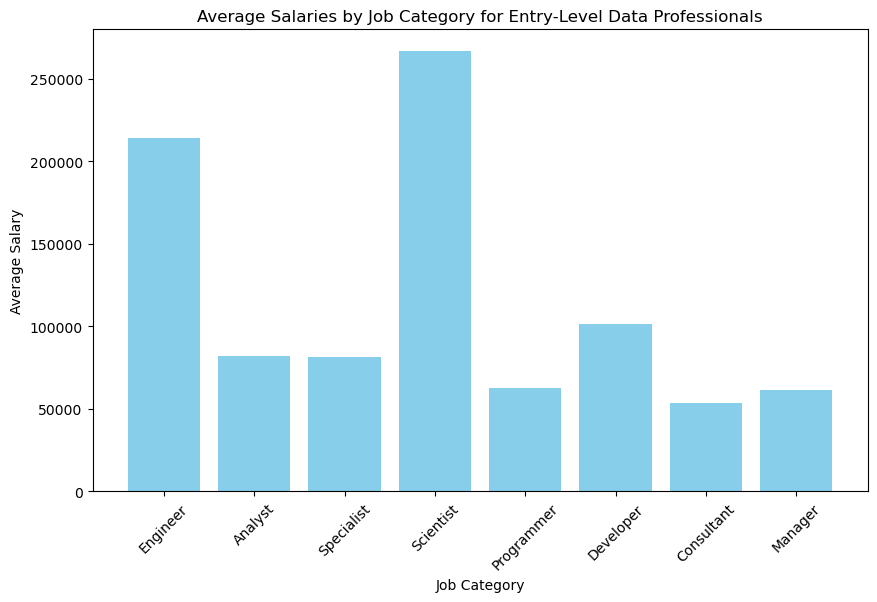

In [20]:
# Calculate the average salary for each job category
category_avg_salaries = {category: en_entries[en_entries['job_title'].str.contains('|'.join(keywords))]['salary'].mean() for category, keywords in categories.items()}

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(category_avg_salaries.keys(), category_avg_salaries.values(), color='skyblue')
plt.title("Average Salaries by Job Category for Entry-Level Data Professionals")
plt.xlabel("Job Category")
plt.ylabel("Average Salary")
plt.xticks(rotation=45)
plt.show()


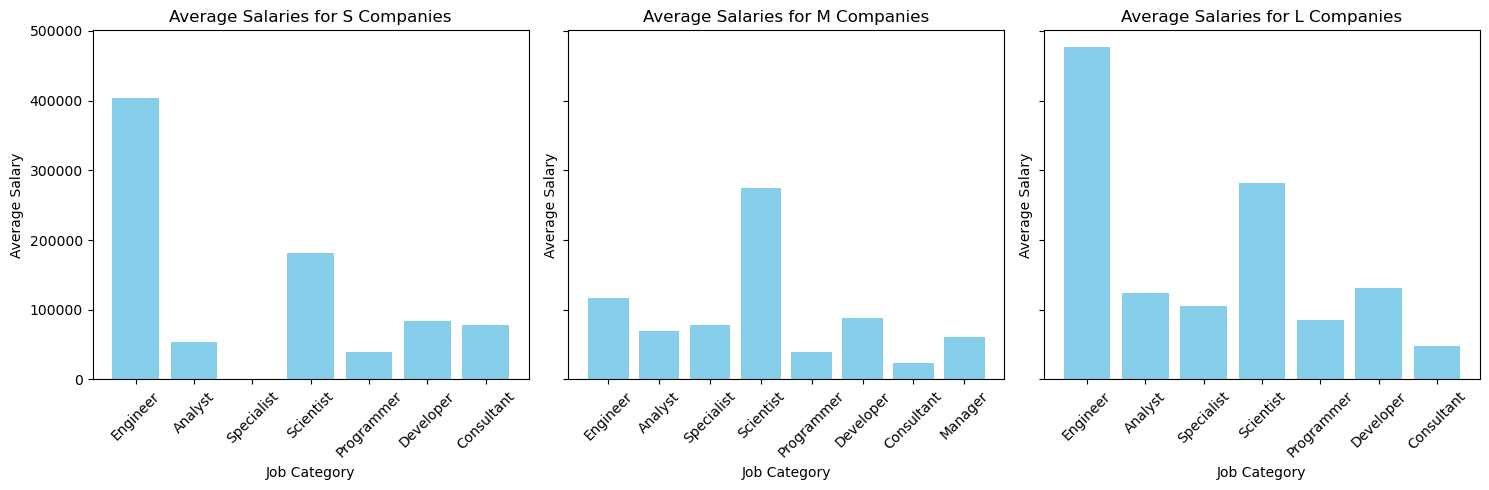

In [21]:
# Define company size categories
company_sizes = ['S', 'M', 'L']

# Create a dictionary to store the average salaries for each category in each company size
category_avg_salaries = {size: {category: 0 for category in categories} for size in company_sizes}

# Iterate through each company size
for size in company_sizes:
    # Filter "EN" entries for the current company size
    size_entries = en_entries[en_entries['company_size'] == size]
    
    # Calculate the average salary for each job category in the current company size
    for category, keywords in categories.items():
        category_avg_salaries[size][category] = size_entries[size_entries['job_title'].str.contains('|'.join(keywords))]['salary'].mean()

# Create a set of subplots (one for each company size)
fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

for i, size in enumerate(company_sizes):
    axs[i].bar(category_avg_salaries[size].keys(), category_avg_salaries[size].values(), color='skyblue')
    axs[i].set_title(f"Average Salaries for {size} Companies")
    axs[i].set_xlabel("Job Category")
    axs[i].set_ylabel("Average Salary")
    axs[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

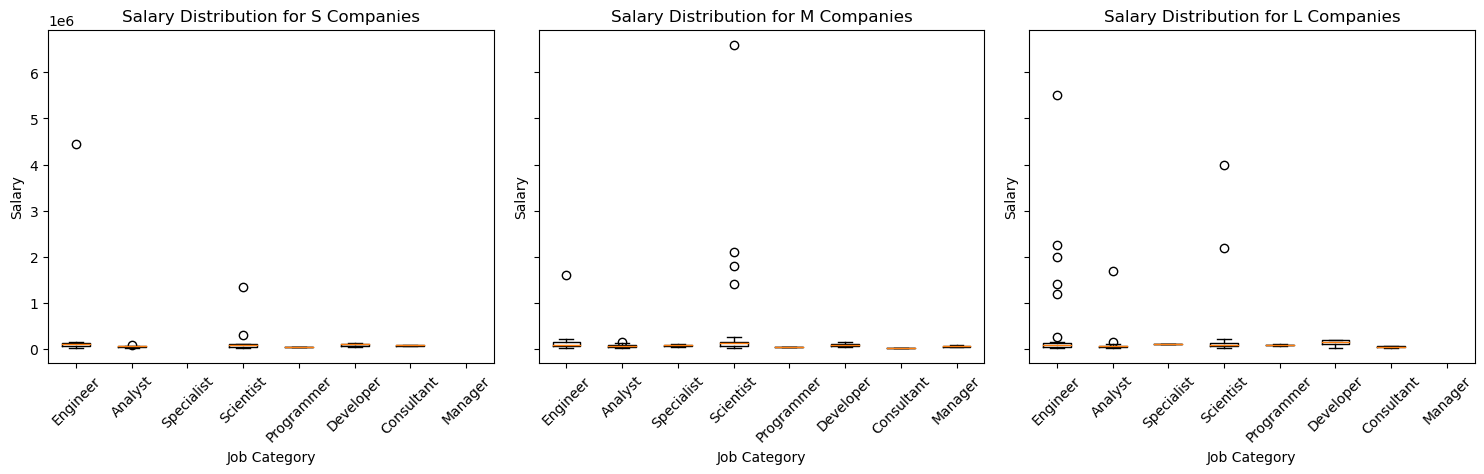

In [22]:
# Define company size categories
company_sizes = ['S', 'M', 'L']

# Create an empty list to store the salary data for each category in each company size
category_salaries = {size: {category: [] for category in categories} for size in company_sizes}

# Iterate through each company size
for size in company_sizes:
    # Filter "EN" entries for the current company size
    size_entries = en_entries[en_entries['company_size'] == size]
    
    # Extract the salary data for each job category in the current company size
    for category, keywords in categories.items():
        category_salaries[size][category] = size_entries[size_entries['job_title'].str.contains('|'.join(keywords))]['salary'].tolist()

# Create a set of subplots (one for each company size)
fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

for i, size in enumerate(company_sizes):
    # Create a box and whisker plot for each category in the current company size
    data = [category_salaries[size][category] for category in category_salaries[size]]
    axs[i].boxplot(data, labels=category_salaries[size].keys())
    axs[i].set_title(f"Salary Distribution for {size} Companies")
    axs[i].set_xlabel("Job Category")
    axs[i].set_ylabel("Salary")
    axs[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


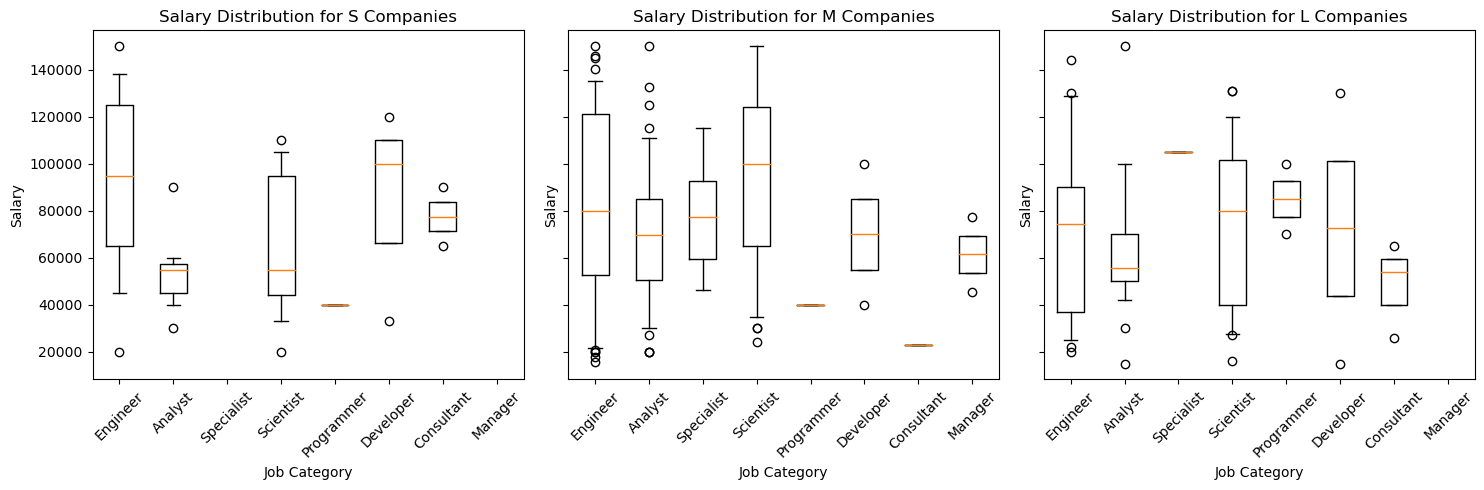

In [23]:
# Define company size categories
company_sizes = ['S', 'M', 'L']

# Create an empty list to store the salary data for each category in each company size
category_salaries = {size: {category: [] for category in categories} for size in company_sizes}

# Define the lower and upper bounds for whiskers
lower_whisker = 10_000  
upper_whisker = 150_000  

# Iterate through each company size
for size in company_sizes:
    # Filter "EN" entries for the current company size
    size_entries = en_entries[en_entries['company_size'] == size]
    
    # Extract the salary data for each job category in the current company size
    for category, keywords in categories.items():
        # Filter data points within the specified salary range
        filtered_data = size_entries[size_entries['job_title'].str.contains('|'.join(keywords))]
        filtered_data = filtered_data[(filtered_data['salary'] >= lower_whisker) & (filtered_data['salary'] <= upper_whisker)]
        
        # Store the filtered salary data
        category_salaries[size][category] = filtered_data['salary'].tolist()

# Create a set of subplots (one for each company size)
fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

for i, size in enumerate(company_sizes):
    # Create a box and whisker plot for each category in the current company size
    data = [category_salaries[size][category] for category in category_salaries[size]]
    axs[i].boxplot(data, labels=category_salaries[size].keys(), whis=[5, 95])  
    axs[i].set_title(f"Salary Distribution for {size} Companies")
    axs[i].set_xlabel("Job Category")
    axs[i].set_ylabel("Salary")
    axs[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()